<a href="https://colab.research.google.com/github/uellington-bonaparte/dotfiles/blob/master/TrabalhoFinal_Uellington.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalho Final - Ciência de Dados - Enap / 2021
* ALUNO: UELLINGTON BONAPARTE ROQUES CÔRTES

### Objetivo do estudo

O objetivo inicial deste projeto é analisar o perfil das apreensões realizadas pela Polícia Federal, comparando-os em quantidade e tipo de material entre os estados.

A hipótese é de que as maiores apreensões são realizadas em estados mais desenvolvidos, como São Paulo e Rio de Janeiro. Devido a apresentação dos dados, não é possível definir o local exato da apreensão, restringindo a capilaridade dos dados aos estados.

Tal estudo poderá possibilitar melhor entendimento das atividades do órgão, bem como melhoria na alocação de recursos.

e avaliando a correspondência entre o valor dos bens apreendidos com o desenvolvimento do estado

Futuramente, é desejável realização de outras análises, por exemplo a correspondência entre o valor dos bens apreendidos com o desenvolvimento do estado, subsidiando decisões em relação ao perdimento em nome do órgão e providências para sua alienação, reduzindo o custo de manter esses materiais em depósito, revertendo os recursos para outras prioridades o órgão e políticas públicas diversas.



### Apresentação do Dataset

O nome do dataset deste projeto é "**apreensoes_pf.csv**" e contém dados de materiais apreendidos pela Polícia Federal ao longo dos anos de 2013 a 2021.

As informações foram obtidas a partir de consulta analítica de apreensões gerado no portal https://bi.pf.gov.br (acesso restrito a servidores), interligado ao sistema de polícia judiciária (ePol). 

**O Único tratamento externo dos dados foi a conversão do arquivo .xlsx (excel) para .csv, devido a problemas no momento da carga dos dados no Google Colab**


#### Link público do Google Drive para Download do Dataset

https://drive.google.com/file/d/1tU-D5z3h70NcIThdN2bej8xoTYyYKmWw/view?usp=sharing

In [1]:
# Configura o google drive
from google.colab import drive
drive.mount('/content/drive')

#caminho do arquivo de dados: '/content/drive/MyDrive/apreensoes_pf.csv'

Mounted at /content/drive


In [2]:
# importa módulos e bibliotecas utilizados
import numpy as np
import pandas as pd
import seaborn as sns
import re   # regex

### Motivação Pessoal

Sou Escrivão da Polícia Federal, lotado no Núcleo de Tecnologia e eventualmente apóio a Corregedoria extraindo e analisando dados de Polícia Judiciária. Devido ao meu cargo possuo conhecimento sobre dados de inquérito e apreensões, facilitando a análise dos dados obtidos e permitindo maior conhecimento do perfil de atuação do órgão em que trabalho.

### Carregando os dados






In [84]:
# carrega o arquivo de apreensões (fonte: bi.pf.gov.br > Estatísticas > Apreensões-Analítico)
# Arquivo convertido para formato .csv (sem alteração/manipulação) pois não estava abrindo no formato .xlsx

# path_apreensoes = '/content/sample_data/apreensoes_pf.csv'
path_apreensoes = '/content/drive/MyDrive/apreensoes_pf.csv'

# carrega a tabela apenas com as colunas Instauração, UF Apreensão, nº Apreensão, Tipo Material, Proc. Área de Atribuição
apreensoes = pd.read_csv(path_apreensoes, sep=';', na_values=['-','*','*-'], encoding='latin1', usecols=[2, 3, 5, 9, 11, 38], names=['Procedimento','Instauracao','UF','Apreensao', 'Material', 'Area'], header=0)

#Acrescenta a coluna ano calculada a partir da extração do campo 'Apreensao'
apreensoes['Ano'] = apreensoes['Apreensao'].apply(lambda x: x.split('/')[-1]).astype(int)

# CORRIGIR A CAPTURA DO ANO (REGEX)
# apreensoes['Ano'] = apreensoes['Procedimento'].apply(lambda x: re.findall('((\/|\s)[1-2]\d{3})', 'IPL 25/2010-4-DPF/AGA/TO')[0][0][1:]) #.astype(int) #

#Reorganiza as colunas, eliminando a coluna 'Apreensao' (utilizada somente para identificar o ano)
apreensoes = apreensoes[['UF', 'Material','Ano','Instauracao','Area']]
apreensoes

,UF,Material,Ano,Instauracao,Area
0,SP,Produtos do tabaco e instrumentos,2013,Portaria,DFAZ
1,SP,Cédulas e moedas falsas,2013,Portaria,DFAZ
2,SP,Ordem política e social,2000,Portaria,DFAZ
3,AL,Entorpecentes,2010,Portaria,DIREN
4,AL,Materiais esportivos,2010,Portaria,DIREN
...,...,...,...,...,...
7271,PE,Documentos,2021,Portaria,DRC
7272,PE,Documentos,2021,Portaria,DRC
7273,PE,Documentos,2021,Portaria,DRC
7274,PE,Documentos,2021,Portaria,DRC


In [87]:
# CORRIGIR A CAPTURA DO ANO (REGEX)
apreensoes['Ano'].unique()

array([2013, 2000, 2010, 2015, 2011, 2021, 2020, 2014])

In [123]:
# TESTES DE REGEX PARA A CAPTURA DO ANO
regex_ano = re.findall('(NC.{12})(\d{4})','NC 08350002131202104-SR/PF/MG')[0][1]

#  Padroes encontrados:
# 12341/2021  IPL 25/2010-4-DPF/AGA/TO  IPL 2021.14867-DPF/GRA/PR   RDF 2021.14858-DPF/BGE/RS
# TC 4/2021-4-SR/PF/CE  NC 2020.97402-SR/PF/AM RE 2021.6408-DPF/PGZ/PR NCV 2020.95886-SR/PF/ES

# regex_ano = re.findall('((\/|\s)[1-2]\d{3})','IPL 25/2010-4-DPF/AGA/TO')[0][0][1:]

# regex_ano[0][1]
regex_ano

'2021'

### Investigação

As análises iniciais buscaram identificar as unidades da Polícia Federal com maior número absoluto de apreensões, podendo-se destacar os estados de **São Paulo, Paraná e Mato Grosso do Sul**.

**(ANALISAR DADOS EM RELAÇÃO À MEDIANA, MÉDIA E DESVIO PADRÃO, DETERMINANDO UMA ESTIMATIVA POR UF)**

In [223]:
# Agrupar tabela para mostrar todas as ocorrências de Materiais por UF
total_uf = apreensoes[['UF', 'Material']]
total = total_uf.groupby(['UF']).count()

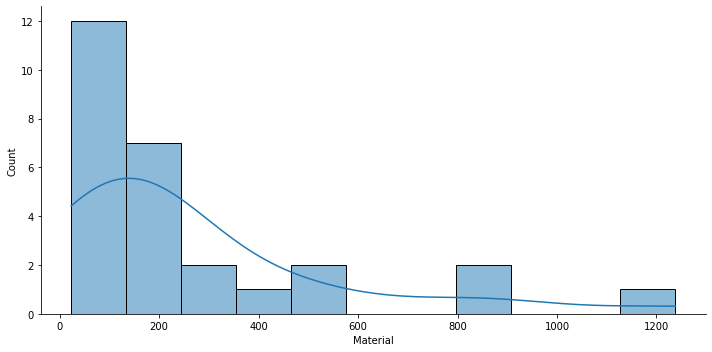

In [259]:
# Gráfico de barras horizontal mostrando as apreensões por estado
sns.displot(total['Material'],kde=True, aspect=2)

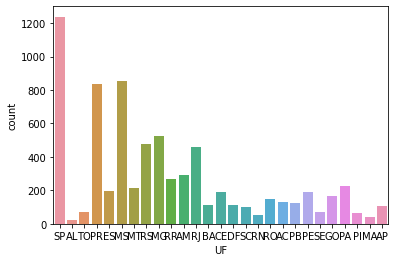

In [218]:
sns.countplot(x = 'UF', data=total_uf)

Em relação ao tipo de material apreendido verifica-se diversas categorias, que vão desde animais silvestres e cigarros a entorpecentes, aeronaves, etc.

In [262]:
# Lista os tipos de materiais apreendidos
tipo_material = pd.DataFrame(apreensoes['Material'].unique())
qtd_ocorrencias = pd.DataFrame(apreensoes['Material'].value_counts())
qtd_ocorrencias.head(50)

,Material
Documentos,1640
Aparelhos eletrônicos,1035
Produtos de informática,862
Entorpecentes,479
Cédulas e moedas falsas,473
Veículos,411
Cédulas e moedas legítimas,406
Objetos de uso pessoal,370
Aparelhos de comunicação,219
Produtos do tabaco e instrumentos,207


Os gráficos abaixo demonstram a concentração de apreensões por tipo de material, bem como os 10 tipos de materiais apreendidos com maior frequência pela Polícia Federal.

In [237]:
# Conta a quantidade de apreensoes por tipo de material, agrupando-as por UF e Ano
# Agrupar tabela para mostrar todas as ocorrências de Materiais por UF
# total_uf = apreensoes[['UF', 'Material']]
# total = total_uf.groupby(['UF']).count()

apreensoes.set_index(['UF','Ano'])

g_apreensoes = apreensoes.groupby([apreensoes['UF'],apreensoes['Material'],apreensoes['Ano']])
g_apreensoes = apreensoes.groupby(['UF','Material']) #.reset_index(name='Qtde')

# g_apreensoes.count()
# apreensoes['Material'].unique
# g_apreensoes.agg({'Material':'count'}) #.sort_values(by=['UF','Material'])

In [ ]:
# Gráfico exibindo os 10 materiais mais apreendidos
tipo_material = pd.DataFrame(apreensoes['Material'].unique())
qtd_ocorrencias = pd.DataFrame(apreensoes['Material'].value_counts())
top10 = qtd_ocorrencias.sort_values(by='Material', ascending=False).head(10)
top10

In [243]:
# Gráfico de distribuição por tipo de material

As maiores apreensões dos Estados que lideram a lista de apreensãoes estão distribuídas da seguinte maneira:

In [266]:
# Maiores apreensões dos estados de São Paulo, Mato Grosso do Sul e Paraná
sp = apreensoes[apreensoes['UF'] == 'SP']

sp['Ano'] #.unique()
sp

,UF,Material,Ano,Instauracao,Area
0,SP,Produtos do tabaco e instrumentos,2013,Portaria,DFAZ
1,SP,Cédulas e moedas falsas,2013,Portaria,DFAZ
2,SP,Ordem política e social,2000,Portaria,DFAZ
5,SP,Entorpecentes,2015,Portaria,DIREN
18,SP,Entorpecentes,2021,Portaria,DIREN
...,...,...,...,...,...
7204,SP,Entorpecentes,2021,NaN,NaN
7205,SP,Entorpecentes,2021,NaN,NaN
7206,SP,Entorpecentes,2021,NaN,NaN
7208,SP,Entorpecentes,2021,Portaria,DIREN


Foram verificados também estados com maior número de apreensão de veículos, armas e entorpecentes.

In [ ]:
# Estados com maior número de apreensoes de veículos, armas e entorpecentes
veiculos = apreensoes[apreensoes['Materiais'] == 'Veículos']
armas = apreensoes[apreensoes['Materiais'] == 'Armas']
entorpecentes = apreensoes[apreensoes['Materiais'] == 'Entorpecentes']


### Conclusões e Achados


#### Quanto à quantidade de apreensões
*   Como era de se esperar, **São Paulo é o estado com maior número de apreensões** absolutas, representando cerca de **XX% do total**.
*   **Mato Grosso do Sul e Paraná estão em segundo e terceiro lugares**, respectivamente, no ranking de apreensões, à frente de Rio de Janeiro e Minas Gerais.Tal fato se explica pelo grande número apreensoes de produtos importados irregularmente, entorpecentes, veículos, etc...
*   Uma possível explicação pela posição alcançada por Mato Grosso do Sul e Paraná, pode ter relação com a localização geográfica dos dois estados, fronteiras com Paraguai e Bolívia, com grande número apreensoes de produtos importados irregularmente, entorpecentes, veículos, etc... Entretanto, tal tese demanda outras análises estatísticas não estudadas neste projeto.



#### Quanto ao tipo de material apreendido
*   Verificou-se grande quantidade de documentos, equipamentos eletrônicos, e de informática, entorpecentes, cédulas falsas, veículos e dinheiro.
*   Os estados que mais apreendem veículos, armas e entorpecentes, são os Estados de XXX.
*   Devido à baixa granularidade dos dados estudados, não é possível determinar os tipos de crime e suas proporções em relação a estas apreensões, sendo certo que estão diluidas entre diversas tipificações penais.
*   Tal análise pode ser aprofundada, utilizando-se os dados socio-econômicos do IBGE e de ocorrências criminais do Ministério da Justiça a fim de identificar eventuais correlações entre a taxa de criminalidade e outros indicadores. 